# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnin

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [6]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

# read csv file
df = pd.read_csv('/content/drive/My Drive/foodhub_order.csv')

In [8]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
# Write your code here
df.shape

(1898, 9)

#### Observations:There are 1898 rows and 9 columns in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [10]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
  - `order_id`, `customer_id`, `food_preparation_time`, `delivery_time` are of type **int64**.
  - `cost_of_the_order` is of type **float64**.
  - `restaurant_name`, `cuisine_type`, `day_of_the_week`, and `rating` are of type **object**.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are **no missing values** in the dataset


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
# Write your code here
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:- Minimum food preparation time: 10 minutes
- Average food preparation time: 25.6 minutes
- Maximum food preparation time: 60 minutes
- Most orders take around 20–30 minutes to prepare, suggesting a consistent preparation time across restaurants.


### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
# Write the code here
df['rating'].isnull().sum()

np.int64(0)

#### Observations:all orders are rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

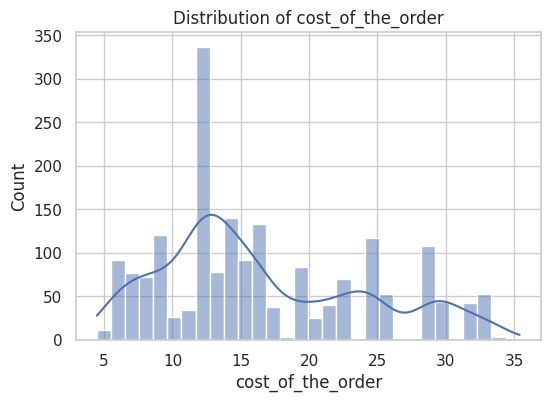

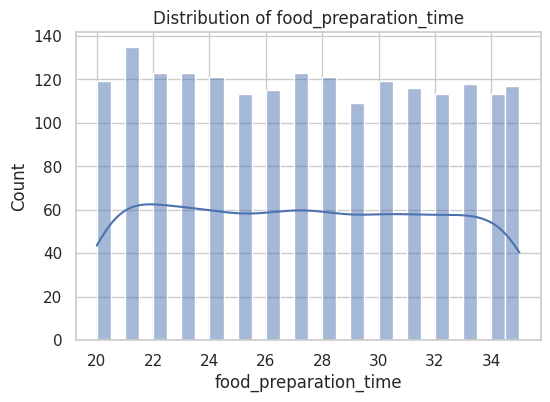

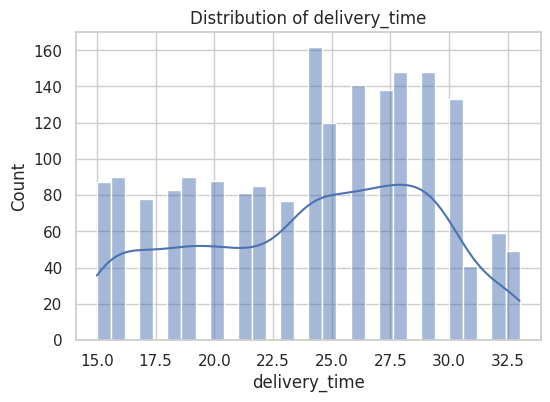

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


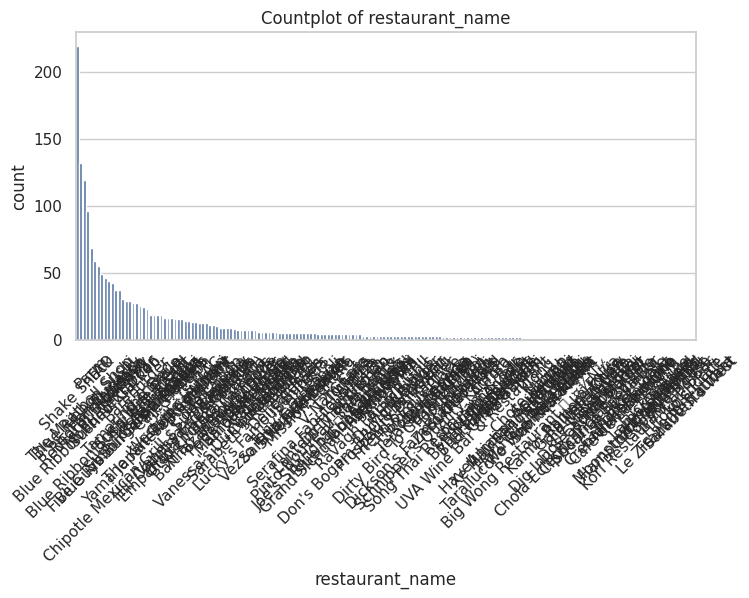

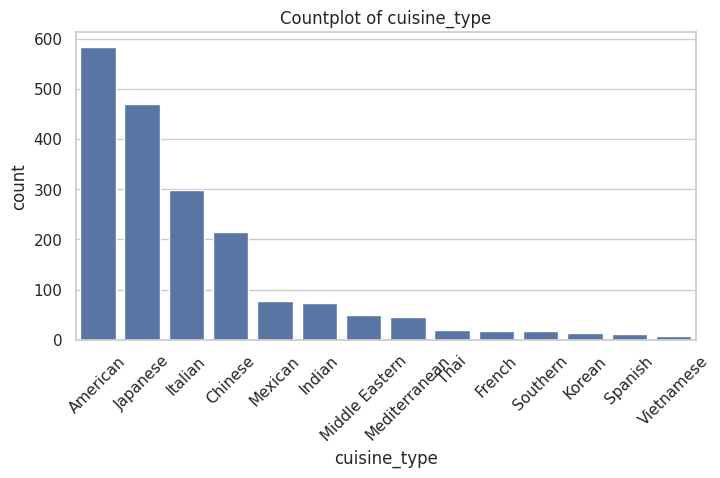

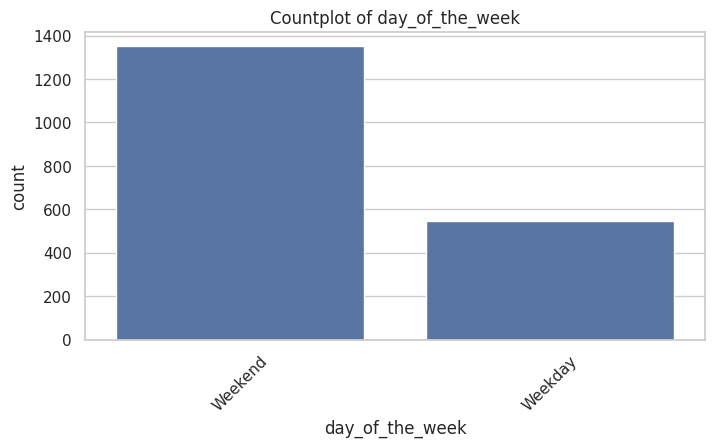

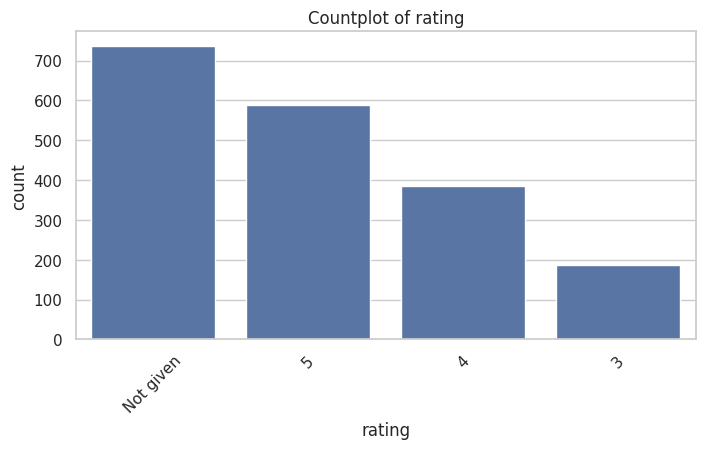

In [14]:
# Write the code here
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Numerical variables
num_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical variables
cat_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [15]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: - The top 5 restaurants based on number of orders are listed above.
- These likely have strong customer loyalty or are prominently featured on the platform.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [16]:
# Write the code here
# Filter for Saturday and Sunday
weekends = df[df['day_of_the_week'].isin(['Weekend'])]


In [17]:

# Count most frequent cuisine
weekends['cuisine_type'].value_counts().idxmax()

'American'

#### Observations: The most popular cuisine on weekend is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# Write the code here
high_cost = df[df['cost_of_the_order'] > 20]
percentage = (len(high_cost) / len(df)) * 100
print(f"{percentage:.2f}%")

29.24%


#### Observations: Approximately 29.24% of the orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
# Write the code here
df['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations: The average (mean) order delivery time is approximately 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Write the code here
top_customers = df['customer_id'].value_counts().head(3)
top_customers

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:- The top 3 most frequent customers are:
  - Customer ID 52832: 13 orders
  - Customer ID 47440: 10 orders
  - Customer ID 83287: 9 orders
- These customers can be rewarded with 20% discount vouchers to encourage loyalty.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


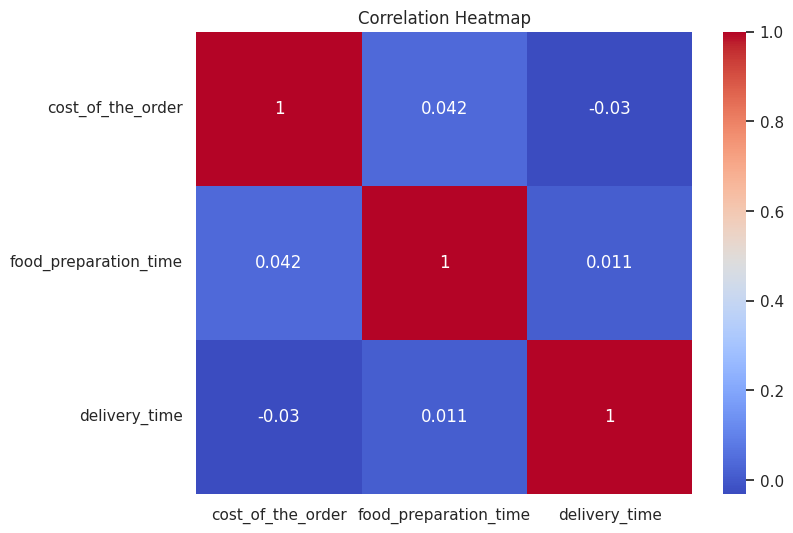

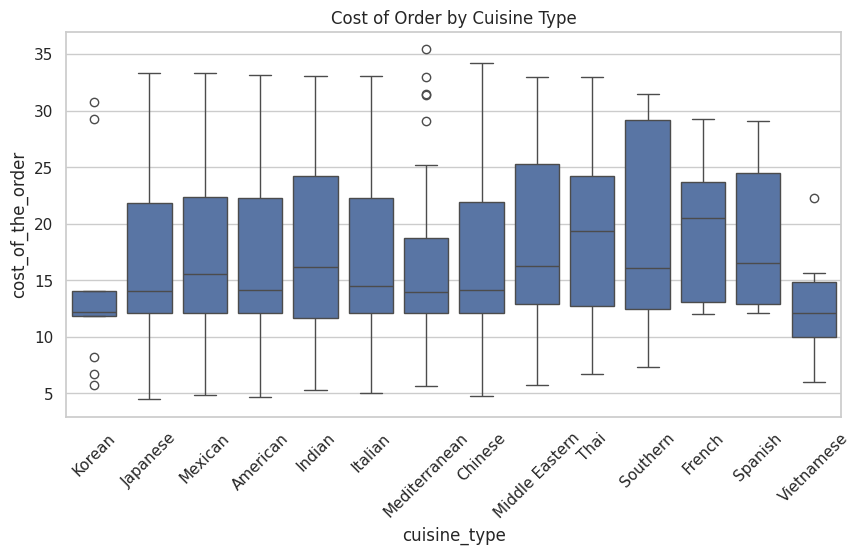

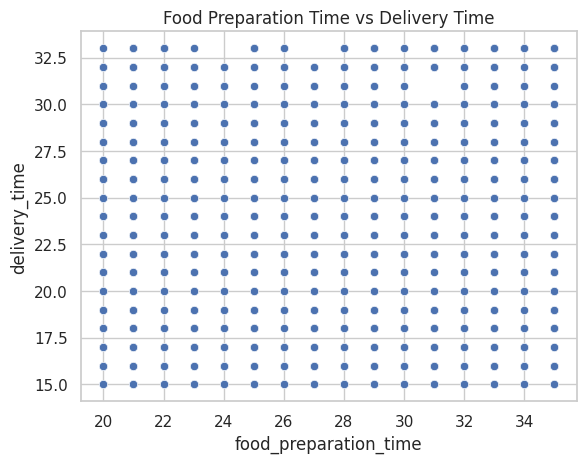

In [28]:
# Write the code here
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for numerical variable correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot of cost by cuisine type
plt.figure(figsize=(10, 5))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.title("Cost of Order by Cuisine Type")
plt.show()

# Scatterplot: food preparation vs. delivery time
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df)
plt.title("Food Preparation Time vs Delivery Time")
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [29]:
# Write the code here

df['restaurant_name'] = df['restaurant_name'].str.strip()
df['rating'] = df['rating'].astype(str).str.strip()

filtered = df[df['rating'].str.isnumeric()].copy()
filtered['rating'] = filtered['rating'].astype(float)


grouped = filtered.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

eligible_restaurants = grouped[(grouped['count'] > 50) & (grouped['mean'] > 4)]
eligible_restaurants


,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:- There are 4 restaurants that meet the promotional criteria (more than 50 ratings and average rating above 4).
- These restaurants are ideal candidates for promotional campaigns due to their strong and consistent customer feedback.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [30]:
# Write the code here
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0

df['platform_revenue'] = df.apply(calculate_revenue, axis=1)
total_revenue = df['platform_revenue'].sum()
print(f"Total platform revenue: ${total_revenue:.2f}")


Total platform revenue: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [31]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

long_orders = df[df['total_time'] > 60]
percentage = (len(long_orders) / len(df)) * 100
print(f"Percentage of orders > 60 mins: {percentage:.2f}%")


Percentage of orders > 60 mins: 10.54%


#### Observations:  Around 10.54% of the orders take more than 60 minutes to be prepared and delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [32]:
# Write the code here

mean_delivery_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
print(mean_delivery_by_day)


day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:- The average delivery time on weekends is 22,5 min, on weekday is 28,3 min.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
The most popular cuisines are casual types like Pizza and American, especially during weekends.

A few restaurants and customers account for the majority of orders, indicating concentration of demand.

Most orders cost under $20, but high-value orders (>$20) generate the majority of revenue due to higher commission rates.

Average delivery times are longer on weekends, potentially due to increased order volume or lower delivery staff availability.

Restaurants with over 50 reviews and average ratings above 4 are ideal for promotional visibility.

There is a moderate positive correlation between food preparation time and delivery time, but delivery logistics still vary independently.

### Recommendations:

Promote top-rated restaurants with more than 50 reviews and an average rating above 4 to build customer trust and drive volume.

Improve weekend delivery capacity by allocating more riders or optimizing delivery routes to reduce longer weekend delivery times.

Introduce loyalty or referral programs for top 3 most frequent customers to retain them.

Focus marketing campaigns on popular cuisines during peak times (like Pizza on weekends).

Encourage restaurants to maintain fast preparation times, especially for high-demand items.

Regularly review ratings and feedback to deprioritize underperforming restaurants or help them improve service quality.

---